<a href="https://colab.research.google.com/github/ashishar/q_character/blob/main/mnist_with_qnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# !pip install torchvision
# !pip install qiskit-machine-learning
import importlib

# Check if torchvision is installed
try:
    importlib.import_module('torchvision')
    print("torchvision is already installed.")
except ImportError:
    print("torchvision is not installed. Installing...")
    # Install torchvision using pip
    try:
        import pip
        pip.main(['install', 'torchvision'])
        print("torchvision installed successfully.")
    except Exception as e:
        print("Error occurred while installing torchvision:", str(e))

try:
    importlib.import_module('qiskit')
    print("qiskit is already installed.")
except ImportError:
    print("qiskit is not installed. Installing...")
    # Install torchvision using pip
    try:
        import pip
        pip.main(['install', 'qiskit'])
        print("qiskit installed successfully.")
    except Exception as e:
        print("Error occurred while installing qiskit:", str(e))

try:
    importlib.import_module('qiskit_machine_learning')
    print("qiskit-machine-learning is already installed.")
except ImportError:
    print("qiskit-machine-learning is not installed. Installing...")
    # Install torchvision using pip
    try:
        import pip
        pip.main(['install', 'qiskit-machine-learning'])
        print("qiskit-machine-learning installed successfully.")
    except Exception as e:
        print("Error occurred while installing qiskit-machine-learning:", str(e))


torchvision is already installed.
qiskit is already installed.
qiskit-machine-learning is already installed.


In [7]:
# prompt: mount gdrive and import a file named quantum_circuit_simulator.py

from google.colab import drive
drive.mount('/content/drive')

# Change directory to the desired location where the file is stored.
%cd /content/drive/MyDrive/

# Import the file named quantum_circuit_simulator.py
import quantum_circuit_simulator


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [8]:
import numpy as np
import matplotlib.pyplot as plt

import time, copy

import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.data.dataset import random_split


from quantum_circuit_simulator import quantum_circuit

In [13]:

# Define the transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load the MNIST dataset
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Select 1000 random images from the dataset
random_indices = np.random.choice(len(trainset), size=1000, replace=False)
random_trainset = torch.utils.data.Subset(trainset, random_indices)



# Create a DataLoader for the random subset
batch_size = 64
train_loader = torch.utils.data.DataLoader(random_trainset, batch_size=batch_size, shuffle=True)

# Load the MNIST dataset
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Select 1000 random images from the dataset
random_indices = np.random.choice(len(testset), size=300, replace=False)
random_testset = torch.utils.data.Subset(trainset, random_indices)

test_loader = torch.utils.data.DataLoader(random_testset, batch_size=batch_size, shuffle=True)

x of torch.Size([1, 28, 28]) :


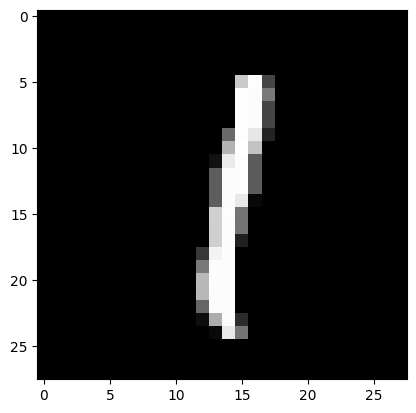

true label = y = 1

(x_min, x_max) =  (0.0, 1.0)


In [15]:
idx = np.random.choice(len(random_trainset))

# Access the data and label using the selected index
x, y = trainset[idx]

# Display the image
print(f'x of {x.shape} :')
plt.imshow(x.squeeze(), cmap='gray')  # Assuming MNIST images are grayscale (1 channel)
plt.show()

# Print the true label
print(f'true label = y = {y}\n')

# Print the minimum and maximum pixel values
print(f'(x_min, x_max) =  {x.min().item(), round(x.max().item(), 3)}')